### Import library

In [84]:
import pandas as pd
import numpy as anp
import sklearn
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns

### Download dataset

In [73]:
dataset = datasets.fetch_california_housing(data_home=None,
                                        download_if_missing=True,
                                        return_X_y=False,
                                        as_frame=True)

### Check Dataset

In [74]:
dataset

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

### define X, y

In [75]:
X = dataset['data']
y = dataset['target']

### check X data

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### fit selectKBest

In [79]:
best_features = SelectKBest(score_func=f_regression, k=8)
fit = best_features.fit(X,y)

### check feature scores

In [81]:
feature_scores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)],axis=1)
feature_scores.columns = ['Specs','Score']

feature_scores.nlargest(8,'Score')

,Specs,Score
0,MedInc,18556.571631
2,AveRooms,487.757462
6,Latitude,438.005453
1,HouseAge,232.841479
3,AveBedrms,45.108576
7,Longitude,43.698976
4,Population,12.547410
5,AveOccup,11.635342


### fit model

In [85]:
model = ExtraTreesRegressor()
model.fit(X,y)

model.feature_importances_

array([0.50186861, 0.07035609, 0.04174722, 0.03423284, 0.02754407,
       0.10723049, 0.10572781, 0.11129287])

### check feature importances

<Axes: >

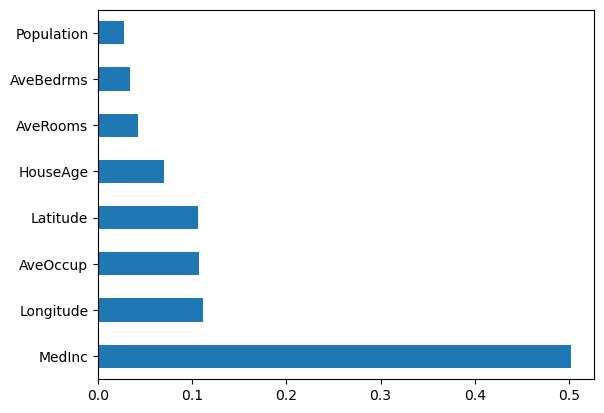

In [86]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')

### check feature map

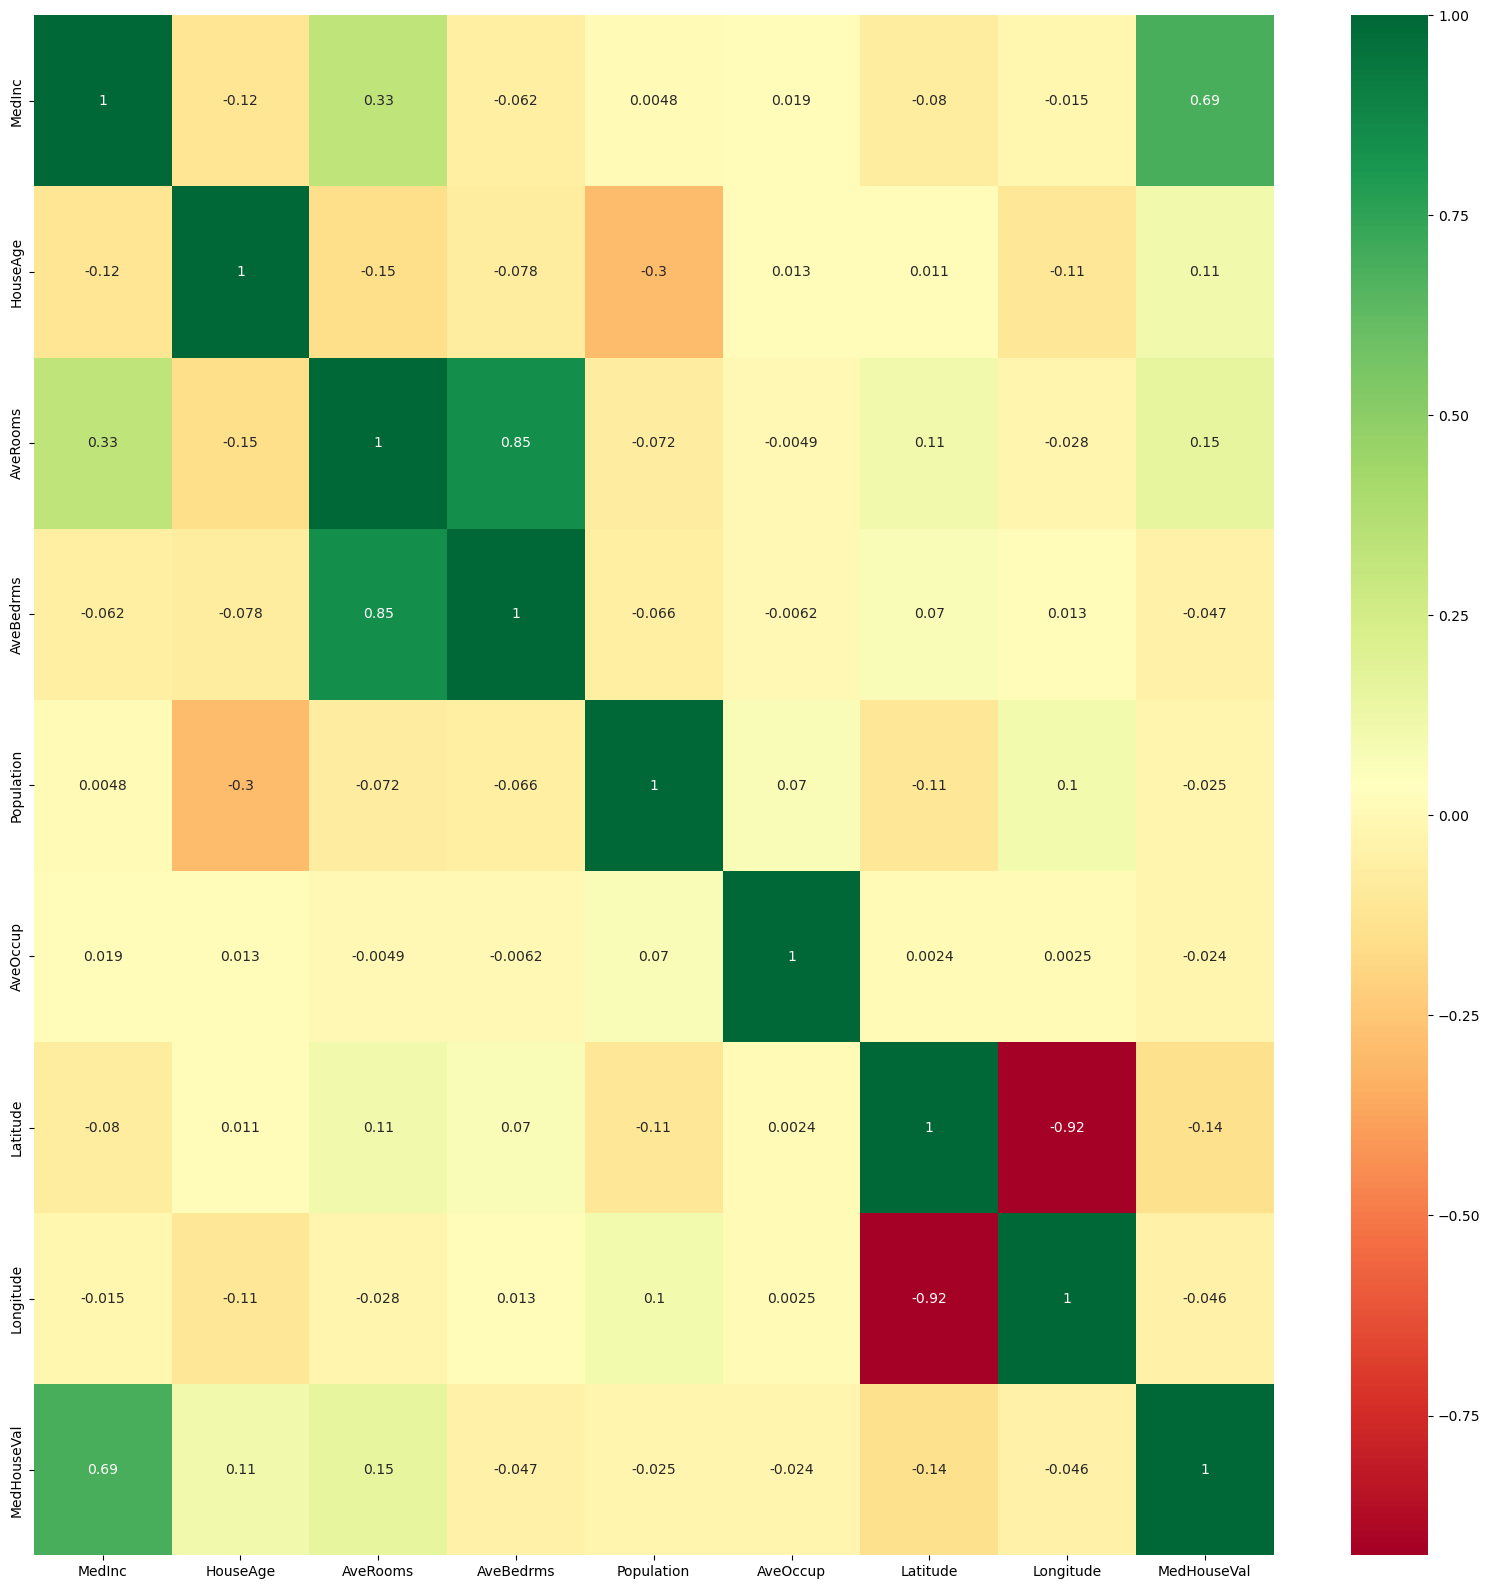

In [93]:
data = pd.concat([X,y],axis=1)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")